In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

In [27]:
patientNumber = "01"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))
colors = list(mcolors.TABLEAU_COLORS.values())
save_state = False

In [28]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

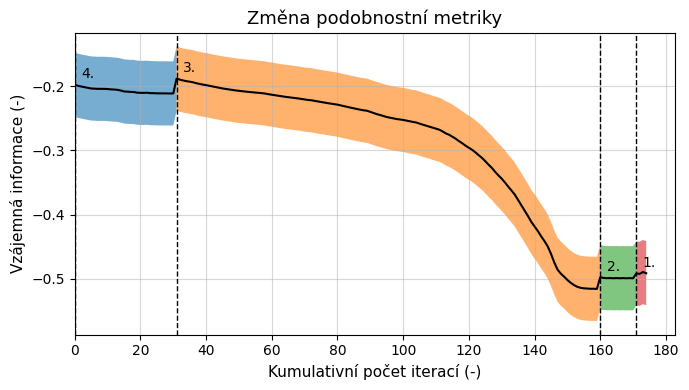

In [92]:
def plotMetricValues(metric_values, multires_iters, 
                     shrink_factors, smooth_sigmas, save=False):
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    
    iters = np.arange(0, len(metric_values))
    
    ax_metric.plot(iters, metric_values, label="Vzájemná informace", c="black")

    # ax_metric.plot(multires_iters, metric_values[multires_iters], marker="o", 
    #               label="Registrační úroveň", linestyle="none", 
    #               markeredgecolor="none", markersize=6., c="black")  
    
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05,
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric.fill_between(iters[multi_iter:iters[-1] + 1],
                                   metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                   metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
            
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_ylim = ax_metric.get_ylim()
    ax_xlim = ax_metric.get_xlim()
    ax_metric.vlines(multires_iters, 
                     ax_ylim[0], # metric_values[multires_iters] - 0.075 
                     ax_ylim[1], # metric_values[multires_iters] + 0.075 
                     ls="--", lw=1., colors="black")
    
    levels = [level for level in range(len(shrink_factors), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric.annotate(f"{level}.", (multi_iter + 2,
                                         metric_values[multi_iter] + 0.01))
    # param_text = f"Parametry registračních úrovní:\n S = {shrink_factors}\n $\sigma^2$ = {smooth_sigmas}"
    # ax_metric.text(iters[4], -0.6, param_text, bbox=dict(edgecolor="k",
    #                                                      facecolor="none"))
    
    # ax_metric.set_xlim([0, None])
    # ax_metric.set_ylim([None, None])
        # ax_metric.annotate(f"{level}. S = {shrink}\n    $\sigma^2$ = {smooth}", 
        #                   (multi_iter + 2, ax_ylim[0] + 0.01))
    
    # ax_ylim = ax_metric.get_ylim()
    # ax_metric.vlines(multires_iters, ax_ylim[0], ax_ylim[1], ls="--", colors="black")
            
    # 
    # ax_metric.fill_between(iters[multires_iters[0]:multires_iters[1] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[0]:multires_iters[1] + 1],
    #                  facecolor="red", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[1]:multires_iters[2] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[1]:multires_iters[2] + 1],
    #                  facecolor="blue", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[2]:iters[-1] + 1], 
    #                     ax_ylim[0], 
    #                     ax_ylim[1],
    #                  facecolor="green", alpha=0.5)
    ax_metric.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace (-)", fontsize=11)
    ax_metric.set_title("Změna podobnostní metriky", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 20))
    ax_metric.grid(alpha=0.5)
    #ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")

plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], 
                 regInfo["shrinkFactors"], regInfo["smoothingSigmas"], save=save_state)

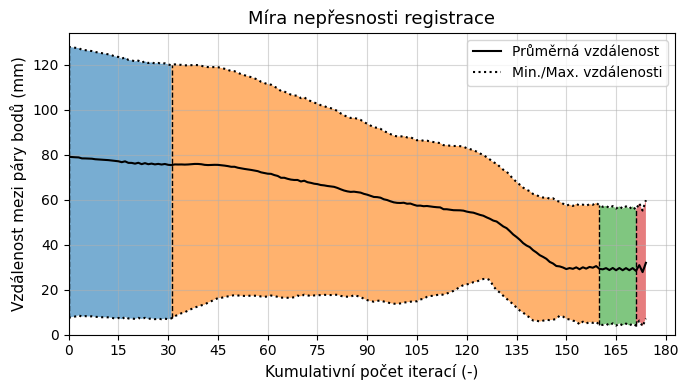

In [97]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, save=False):
    iters = np.arange(0, len(metric_values))
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(iters, mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.plot(iters, min_errors, c="black", ls="dotted", label="Min./Max. vzdálenosti")
    ax_tre.plot(iters, max_errors, c="black", ls="dotted")
    
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   min_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   max_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                   min_errors[multi_iter:iters[-1] + 1],
                                   max_errors[multi_iter:iters[-1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
    
    ax_tre.vlines(multires_iters, min_errors[multires_iters], max_errors[multires_iters], 
                  ls="--", lw=1., colors="black")

    # ax_tre.fill_between(iters[multires_iters[0]:multires_iters[1] + 1], 
    #                     min_errors[:multires_iters[1] + 1], 
    #                     max_errors[:multires_iters[1] + 1],
    #                  facecolor="red", alpha=0.5)    
    # ax_tre.fill_between(iters[multires_iters[1]:multires_iters[2] + 1], 
    #                     min_errors[multires_iters[1]:multires_iters[2] + 1], 
    #                     max_errors[multires_iters[1]:multires_iters[2] + 1],
    #                  facecolor="blue", alpha=0.5)
    # ax_tre.fill_between(iters[multires_iters[2]:iters[-1] + 1], 
    #                     min_errors[multires_iters[2]:iters[-1] + 1], 
    #                     max_errors[multires_iters[2]:iters[-1] + 1],
    #                  facecolor="green", alpha=0.5)
    # ax_tre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
    #               label="Registrační úroveň", linestyle="none",
    #                markeredgecolor="none", markersize=6., c="black")
    # plt.fill_betweenx(max_errors - min_errors, 
    #                   multires_iters[0], multires_iters[1], alpha=0.5)
    ax_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_tre.set_ylabel("Vzdálenost mezi páry bodů (mm)", fontsize=11)
    ax_tre.set_title("Míra nepřesnosti registrace", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")

plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], save=save_state)

In [100]:
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
initialErrors = np.zeros(shape=(10, 2, 12))
gradientErrors = np.zeros(shape=(10, 12))
gradientLineErrors = np.zeros(shape=(10, 12))
gradientLbf = np.zeros(shape=(10, 12))

for idx, num in enumerate(patNumbers):
    errors = np.load(f"input_files\\pacient_{num}\\"
                     f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    initialErrors[:, 0, idx] = errors[0, :]
    initialErrors[:, 1, idx] = errors[1, :]

for idx, num in enumerate(patNumbers):
    gradErrors = np.load(f"input_files\\pacient_{num}\\"
                     f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradientErrors[:, idx] = gradErrors[-1, :]

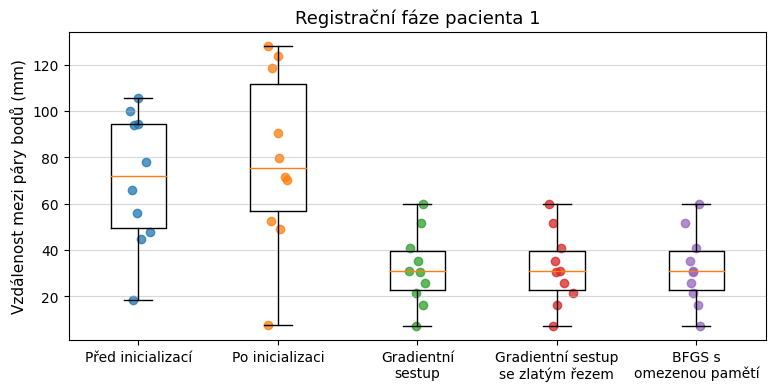

In [101]:
def plotPatientErrorBox(patient_errors, reg_stages, pat_number, save=False):
    fig_box, ax_box = plt.subplots(1, 1, figsize=(9, 4))

    ax_box.boxplot(patient_errors, labels=reg_stages, widths=0.4, showfliers=False)
    scatter_xaxis = []
    for indx, col in enumerate(range(patient_errors.shape[1])):
        scatter_xaxis.append(np.random.normal(indx + 1, 0.04, size=patient_errors.shape[0]))
    
    for xaxis, values, color in zip(scatter_xaxis, patient_errors.T, palette):
        ax_box.scatter(xaxis, values, c=color, alpha=0.75)
    
    ax_box.yaxis.grid(True, alpha=0.5)
    ax_box.set_title(f"Registrační fáze pacienta {pat_number + 1}", fontsize=13)
    ax_box.set_ylabel("Vzdálenost mezi páry bodů (mm)", fontsize=11)
    plt.show()

    if save:
        fig_box.savefig(f"{regDir}pacient{patientNumber}Hist{view.upper()}.pdf", bbox_inches="tight")
        
regStages = ["Před inicializací", "Po inicializaci", "Gradientní\nsestup", 
             "Gradientní sestup\nse zlatým řezem", "BFGS s\nomezenou pamětí"]
palette = colors[:5]
patNumber = 0 # 0 až 11 = 12 pacientů
patientErrors = np.array([initialErrors[:, 0, patNumber],
                          initialErrors[:, 1, patNumber],
                          gradientErrors[:, patNumber],
                          gradientErrors[:, patNumber],
                          gradientErrors[:, patNumber]])
plotPatientErrorBox(patientErrors.T, regStages, patNumber, save=save_state)

In [98]:
# patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
# initialErrors = np.zeros(shape=(10, 2, 12))
# gradientErrors = np.zeros(shape=(10, 12))
# gradientLineErrors = np.zeros(shape=(10, 12))
# gradientLbf = np.zeros(shape=(10, 12))
# 
# for idx, num in enumerate(patNumbers):
#     errors = np.load(f"input_files\\pacient_{num}\\"
#                      f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
#     initialErrors[:, 0, idx] = errors[0, :]
#     initialErrors[:, 1, idx] = errors[1, :]
# 
# for idx, num in enumerate(patNumbers):
#     gradErrors = np.load(f"input_files\\pacient_{num}\\"
#                      f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
#     gradientErrors[:, idx] = gradErrors[-1, :]
    
# allErrors = np.array([initialErrors[:, 0].ravel(),
#              initialErrors[:, 1].ravel(),
#              gradientErrors.ravel(),
#              gradientErrors.ravel(),
#              gradientErrors.ravel()])
# labels=["Před registrací", "Inicializace", "Gradient descent", "Gradient descent\nline search", "LBFGS2"]
# 
# errorDf = pd.DataFrame(data=allErrors.T, columns=labels)
# errorDf

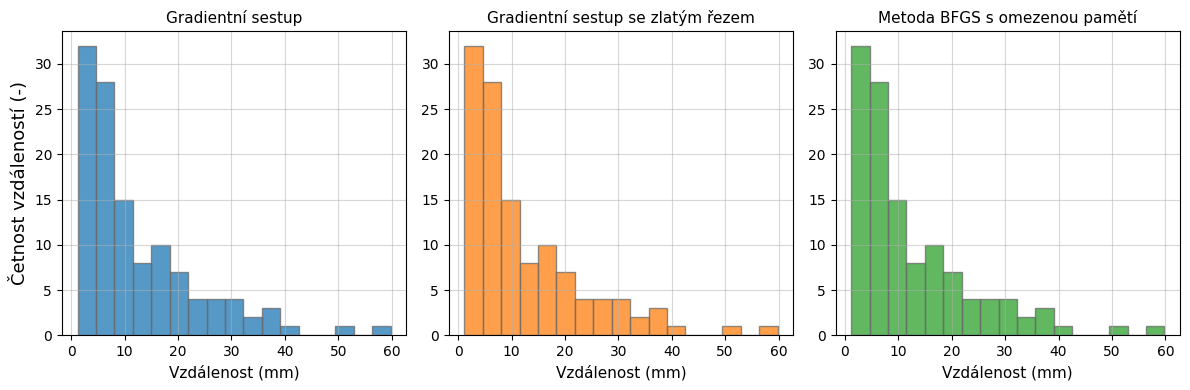

In [261]:
def plotErrorHist(gradient_errors, reg_methods, save=False):
    fig_hist, ax_hist = plt.subplots(1, 3, figsize=(12, 4))

    for ax, method, color in zip(ax_hist, reg_methods, colors):
        ax.hist(gradient_errors.ravel(), bins=17, alpha=0.75, color=color, 
                edgecolor="dimgray", linewidth=1.)
    # ax_hist.hist(gradientErrors[:, 1].ravel(), bins=20, alpha=0.5, label="Inicializace", color="orange")
    # ax_hist.hist(gradientErrors[:, 2].ravel(), bins=20, alpha=0.5, label="Po registraci", color="green")
        ax.grid(alpha=0.5)
        #ax.set_xticks(np.arange(0, gradientErrors[:, 0].max() + 10, 20))
    #ax_hist.set_yticks(np.arange(0, np.histogram(gradientErrors[:, 2].ravel())[0][0], 10))
        ax.set_xlabel("Vzdálenost (mm)", fontsize=11)
        ax.set_title(method, fontsize=11)
    ax_hist[0].set_ylabel("Četnost vzdáleností (-)", fontsize=13)
    # ax_hist.set_title("Rozložení míry nepřesností")
    # ax_hist.legend()
    fig_hist.tight_layout()
    plt.show()
    
    if save:
        fig_hist.savefig(f"input_files\\globalni_grafy.pdf", bbox_inches="tight")
    

regMethods = ["Gradientní sestup", "Gradientní sestup se zlatým řezem", "Metoda BFGS s omezenou pamětí"]
plotErrorHist(gradientErrors, regMethods, save=save_state)